# Validation COVID Variant - Gamma

## Read libraries 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
import pandas as pd
from datetime import datetime

## Read data

In [2]:
# Carregando lista de arquivos .tsv
path = '/home/juliane.oliveira/workspace/Reproducibility-results_paper2/data/covid_gamma'#os.getcwd()
tsv_files = glob.glob(os.path.join(path, "*.tsv"))

# Carregando arquivos em uma lista de dataframes
df_list = []
for f in tsv_files: 

    df_list.append(pd.read_csv(f, sep='\t'))


# Juntando dados em um único dataframe
df = pd.concat(df_list)


In [3]:
muni = pd.read_csv('/home/juliane.oliveira/Documents/AESOP data structure/ETL_data/DTB_BRASIL_MUNICIPIO.csv',sep = ';')
hubs = pd.read_csv('/home/juliane.oliveira/workspace/Reproducibility-results_paper2/data/lists_of_hubs.csv')

link0 = '/home/juliane.oliveira/Documents/GitHub/aesop-models/scripts/Mobility pipeline/adjacency_matrix_correct.parquet'
matrix = pd.read_parquet(link0, engine='pyarrow')

path = pd.read_csv('/home/juliane.oliveira/workspace/Reproducibility-results_paper2/data/union_paths.csv')

In [4]:
df.head()

,Accession ID,Collection date,Submission date,Location
0,EPI_ISL_2836985,2021-06-08,2021-07-07,South America / Brazil / Rio de Janeiro / Itao...
1,EPI_ISL_2837194,2021-06-15,2021-07-07,South America / Brazil / Rio de Janeiro / Varr...
2,EPI_ISL_2844121,2021-06-08,2021-07-08,South America / Brazil / Sao Paulo / Ribeirao ...
3,EPI_ISL_3118797,2021-03-18,2021-07-29,South America / Brazil / Sao Paulo / Porto Fer...
4,EPI_ISL_3118795,2021-03-17,2021-07-29,South America / Brazil / Sao Paulo / Porto Fer...


In [5]:
df[df['Collection date'] < '2020-12-31']

,Accession ID,Collection date,Submission date,Location
473,EPI_ISL_3233232,2020-11,2021-08-04,South America / Brazil / Rio Grande do Sul
1392,EPI_ISL_2614541,2020-10-26,2021-06-18,South America / Brazil / Goias / Goiania
2821,EPI_ISL_2777467,2020-12-29,2021-07-02,South America / Brazil / Amazonas / Manaus
2822,EPI_ISL_2777468,2020-12-29,2021-07-02,South America / Brazil / Amazonas / Manaus
2823,EPI_ISL_2777466,2020-12-29,2021-07-02,South America / Brazil / Amazonas / Manaus
...,...,...,...,...
7914,EPI_ISL_833172,2020-12-17,2021-01-17,South America / Brazil / Amazonas
7915,EPI_ISL_833169,2020-12-23,2021-01-17,South America / Brazil / Amazonas
8146,EPI_ISL_918501,2020-12-28,2021-02-03,South America / Brazil / Amazonas
8225,EPI_ISL_2491698,2020-12-28,2021-06-11,South America / Brazil / Bahia / Salvador


## Data process

In [6]:
muni = muni.assign(co_ibge_6 = muni['Código Município Completo'].astype(str).str[:6])
muni = muni[['UF', 'Nome_UF', 'Mesorregião Geográfica', 'Nome_Mesorregião',
       'Microrregião Geográfica', 'Nome_Microrregião', 'Município',
       'Código Município Completo', 'Nome_Município','co_ibge_6']]

In [7]:
# Tranformando datas em tipo date 
df[["Collection date", "Submission date"]] = df[["Collection date", "Submission date"]].apply(pd.to_datetime)

In [8]:
# Separando colunas de localidade
df[['continent','country','state','municipality']] = df['Location'].str.split(' / ', expand = True)

# Adicionando código do IBGE no estado e município
#TODO

In [9]:

df = df.assign(ones = 1)

In [10]:
df['municipality'] = df['municipality'].replace('Goiania', 'Goiânia')
df['municipality'] = df['municipality'].replace('Foz do Iguacu', 'Foz do Iguaçu')
df['municipality'] = df['municipality'].replace('Inga', 'Ingá')
df['municipality'] = df['municipality'].replace('Almirante Tamandare', 'Almirante Tamandaré')
df['municipality'] = df['municipality'].replace('SAO JOAO DE PIRABAS', 'São João de Pirabas')
df['municipality'] = df['municipality'].replace('BELEM', 'Belém')
df['municipality'] = df['municipality'].replace('Vila Bela','Vila Bela da Santíssima Trindade')
df['municipality'] = df['municipality'].replace('ARACAJU','Aracaju')
df['municipality'] = df['municipality'].replace('RIO DE JANEIRO', 'Rio de Janeiro')
df['municipality'] = df['municipality'].replace('Garrafao Do Norte','Garrafão do Norte')
df['municipality'] = df['municipality'].replace('SANTAREM','Santarém')
df['municipality'] = df['municipality'].replace('MONTE ALEGRE','Monte Alegre')
df['municipality'] = df['municipality'].replace('ANADIA','Anadia')
df['municipality'] = df['municipality'].replace('SERRA','Serra')
df['municipality'] = df['municipality'].replace('MACEIO','Maceió')
df['municipality'] = df['municipality'].replace('SGC','São Gabriel da Cachoeira')
df['municipality'] = df['municipality'].replace('Jau','Jaú')
df['municipality'] = df['municipality'].replace('Chapeco','Chapecó')
df['municipality'] = df['municipality'].replace('Sao Paulo','São Paulo')
df['municipality'] = df['municipality'].replace('Aparecida de Goiania','Aparecida de Goiânia')
df['municipality'] = df['municipality'].replace('RIO BRANCO','Rio Branco')
df['municipality'] = df['municipality'].replace('Belem','Belém')
df['municipality'] = df['municipality'].replace('Joao Pessoa', 'João Pessoa')
df['municipality'] = df['municipality'].replace('Concordia Do Para','Concórdia do Pará')
df['municipality'] = df['municipality'].replace('Varzea Grande','Várzea Grande')
df['municipality'] = df['municipality'].replace('Sao Jose de Ribamar','São José de Ribamar')
df['municipality'] = df['municipality'].replace('Sao Jose do Rio Preto','São José do Rio Preto')
df['municipality'] = df['municipality'].replace('Sao Jose dos Campos','São José dos Campos')
df['municipality'] = df['municipality'].replace('VICOSA','Viçosa')
df['municipality'] = df['municipality'].replace('Maceio','Maceió')
df['municipality'] = df['municipality'].replace('GRAMADO','Gramado')
df['municipality'] = df['municipality'].replace('OBIDOS','Óbidos')
df['municipality'] = df['municipality'].replace('Sao Luis','São Luís')
df['municipality'] = df['municipality'].replace('Ribeirao Preto','Ribeirão Preto')
df['municipality'] = df['municipality'].replace('Macapa','Macapá')
df['municipality'] = df['municipality'].replace('Jutai','Jutaí')
df['municipality'] = df['municipality'].replace('RPE','Rio Preto da Eva')
df['municipality'] = df['municipality'].replace('Orlandia','Orlândia')
df['municipality'] = df['municipality'].replace('Dois Corregos','Dois Córregos')
df['municipality'] = df['municipality'].replace('Camboriu','Camboriú')
df['municipality'] = df['municipality'].replace('Caraibe','Caroebe')
df['municipality'] = df['municipality'].replace('Paraiso do Tocantins','Paraíso do Tocantins')
df['municipality'] = df['municipality'].replace('Turvania','Turvânia')
df['municipality'] = df['municipality'].replace('Crateus','Crateús')
df['municipality'] = df['municipality'].replace('Palhoca','Palhoça')
df['municipality'] = df['municipality'].replace('Aracagy','São José de Ribamar')
df['municipality'] = df['municipality'].replace('Sao Goncalo Do Amarante','São Gonçalo do Amarante')
df['municipality'] = df['municipality'].replace('Mangueira','Alto Paraíso de Goiás')
df['municipality'] = df['municipality'].replace('Irece','Irecê')
df['municipality'] = df['municipality'].replace('Britania','Britânia')
df['municipality'] = df['municipality'].replace('Florianopolis','Florianópolis')
df['municipality'] = df['municipality'].replace('Acarau','Acaraú')
df['municipality'] = df['municipality'].replace('ABAETETUBA','Abaetetuba')
df['municipality'] = df['municipality'].replace('Espirito Santo do Pinhal','Espírito Santo do Pinhal')
df['municipality'] = df['municipality'].replace('Fernando de noronha','Fernando de Noronha')
df['municipality'] = df['municipality'].replace('IMBE','Imbé')
df['municipality'] = df['municipality'].replace('IVOTI','Ivoti')
df['municipality'] = df['municipality'].replace('LAGOA VERMELHA','Lagoa Vermelha')
df['municipality'] = df['municipality'].replace('Sao Joao','São João')
df['municipality'] = df['municipality'].replace('BUJARU','Bujaru')
df['municipality'] = df['municipality'].replace('CAMETA','Cametá')
df['municipality'] = df['municipality'].replace('CASTANHAL','Castanhal')
df['municipality'] = df['municipality'].replace('Comcordia do Para','Concórdia do Pará')
df['municipality'] = df['municipality'].replace('IRITUIA','Irituia')
df['municipality'] = df['municipality'].replace('Sao Miguel do iguacu', 'São Miguel do Iguaçu')
df['municipality'] = df['municipality'].replace('Sao Joaquim','São Joaquim')
df['municipality'] = df['municipality'].replace('CANINDE DE SAO FRANCISCO','Canindé de São Francisco')
df['municipality'] = df['municipality'].replace('ITAPORANGA D’AJUDA',"Itaporanga d'Ajuda")
df['municipality'] = df['municipality'].replace('ITAPORANGA D’’AJUDA',"Itaporanga d'Ajuda")
df['municipality'] = df['municipality'].replace('MONTE ALEGRE DE SERGIPE','Monte Alegre de Sergipe')
df['municipality'] = df['municipality'].replace('NOSSA SENHORA DE LOURDES',"Nossa Senhora de Lourdes")
df['municipality'] = df['municipality'].replace('Propria','Propriá')
df['municipality'] = df['municipality'].replace('RIACHUELO','Riachuelo')
df['municipality'] = df['municipality'].replace('Sao Joao Batista','São João Batista')
df['municipality'] = df['municipality'].replace('SIMAO DIAS','Simão Dias')
df['municipality'] = df['municipality'].replace('Simao Dias','Simão Dias')
df['municipality'] = df['municipality'].replace('Aguas de Sao Pedro','Águas de São Pedro')
df['municipality'] = df['municipality'].replace('NOSSA SENHORA DO SOCORRO','Nossa Senhora do Socorro')
df['municipality'] = df['municipality'].replace('BARRA DOS COQUEIROS','Barra dos Coqueiros')
df['municipality'] = df['municipality'].replace('ALEM PARAIBA','Além Paraíba')
df['municipality'] = df['municipality'].replace('CEDRO DE SAO JOAO','Cedro de São João')
df['municipality'] = df['municipality'].replace('LARANJEIRAS','Laranjeiras')
df['municipality'] = df['municipality'].replace('Mirandopolis','Mirandópolis')
df['municipality'] = df['municipality'].replace('LAJEADO','Lajeado')
df['municipality'] = df['municipality'].replace('PRAINHA','Prainha')
df['municipality'] = df['municipality'].replace('BOQUIM','Boquim')
df['municipality'] = df['municipality'].replace('PATOS DE MINAS','Patos de Minas')
df['municipality'] = df['municipality'].replace('SAO CRISTOVAO','São Cristóvão')
df['municipality'] = df['municipality'].replace('Vicencia','Vicência')
df['municipality'] = df['municipality'].replace('CANHOBA','Canhoba')
df['municipality'] = df['municipality'].replace('PAROBE', 'Parobé')
df['municipality'] = df['municipality'].replace('PELOTAS','Pelotas')
df['municipality'] = df['municipality'].replace('TEUTONIA', 'Teutônia')
df['municipality'] = df['municipality'].replace('TORRES','Torres')
df['municipality'] = df['municipality'].replace('MACAE','Macaé')
df['municipality'] = df['municipality'].replace('ARAPIRACA','Arapiraca')
df['municipality'] = df['municipality'].replace('GIRAU DO PONCIANO','Girau do Ponciano') 
df['municipality'] = df['municipality'].replace('SANTA LUZIA DO NORTE','Santa Luzia do Norte')
df['municipality'] = df['municipality'].replace('SAO MIGUEL DOS CAMPOS','São Miguel dos Campos')
df['municipality'] = df['municipality'].replace('UNIAO DOS PALMARES','União dos Palmares') 
df['municipality'] = df['municipality'].replace('RIO','Rio Preto da Eva')
df['municipality'] = df['municipality'].replace('BETIM','Betim')
df['municipality'] = df['municipality'].replace('BOM JARDIM DE MINAS','Bom Jardim de Minas')  
df['municipality'] = df['municipality'].replace('CARMO DO PARANAIBA','Carmo do Paranaíba')
df['municipality'] = df['municipality'].replace('CORONEL PACHECO','Coronel Pacheco') 
df['municipality'] = df['municipality'].replace('LAGOA FORMOSA','Lagoa Formosa')  
df['municipality'] = df['municipality'].replace('CAPELA','Capela')
df['municipality'] = df['municipality'].replace('Parnaiba','Parnaíba')
df['municipality'] = df['municipality'].replace('CACHOEIRA','Cachoeira')
df['municipality'] = df['municipality'].replace('Sao Francisco do Sul','São Francisco do Sul') 
df['municipality'] = df['municipality'].replace('PATO DE MINAS','Patos de Minas') 
df['municipality'] = df['municipality'].replace('BOCA DA MATA','Boca da Mata')
df['municipality'] = df['municipality'].replace('PATROCINIO','Patrocínio') 
df['municipality'] = df['municipality'].replace('Santa Fe de Goias','Santa Fé de Goiás') 
df['municipality'] = df['municipality'].replace('RIO PARANAIBA', 'Rio Paranaíba')
df['municipality'] = df['municipality'].replace('SERRA DO SALITRE','Serra do Salitre')
df['municipality'] = df['municipality'].replace('CHACARA','Chácara') 
df['municipality'] = df['municipality'].replace('Montes Claros de Goias','Montes Claros de Goiás')
df['municipality'] = df['municipality'].replace('CURUA', 'Curuá')
df['municipality'] = df['municipality'].replace('PORTO ALEGRE','Porto Alegre') 
df['municipality'] = df['municipality'].replace('CANELA','Canela') 
df['municipality'] = df['municipality'].replace('Sao Jose dos Pinhais','São José dos Pinhais')
df['municipality'] = df['municipality'].replace('Bom Jesus de Goias','Bom Jesus de Goiás')
df['municipality'] = df['municipality'].replace('Anapolis','Anápolis')
df['municipality'] = df['municipality'].replace('Maringa','Maringá') 
df['municipality'] = df['municipality'].replace('JURUTI','Juruti') 
df['municipality'] = df['municipality'].replace('ALTAMIRA','Altamira') 
df['municipality'] = df['municipality'].replace('RIBEIROPOLIS','Ribeirópolis') 
df['municipality'] = df['municipality'].replace('Caninde de Sao Francisco','Canindé de São Francisco')
df['municipality'] = df['municipality'].replace('NOVA PONTE','Nova Ponte')
df['municipality'] = df['municipality'].replace('Jose de Freitas','José de Freitas')
df['municipality'] = df['municipality'].replace('Caico','Caicó')
df['municipality'] = df['municipality'].replace('MONTES CLAROS','Montes Claros')
df['municipality'] = df['municipality'].replace('Joao Camara','João Câmara')
df['municipality'] = df['municipality'].replace('Sao Tome','São Tomé')
df['municipality'] = df['municipality'].replace('Sao Jose','São José')
df['municipality'] = df['municipality'].replace('Sao Bernardo do Campo','São Bernardo do Campo')
df['municipality'] = df['municipality'].replace('Sao Luis de Montes Belos','São Luís de Montes Belos')
df['municipality'] = df['municipality'].replace('Sao Pedro das Missoes','São Pedro das Missões')
df['municipality'] = df['municipality'].replace('Sao Carlos','São Carlos')
df['municipality'] = df['municipality'].replace('Parau','Paraú')
df['municipality'] = df['municipality'].replace('Tangara','Tangará')
df['municipality'] = df['municipality'].replace('Pocos de Caldas','Poços de Caldas')
df['municipality'] = df['municipality'].replace('Santo Antonio do Aventureiro','Santo Antônio do Aventureiro')
df['municipality'] = df['municipality'].replace('Unai','Unaí')
df['municipality'] = df['municipality'].replace('Itaipulandia','Itaipulândia')
df['municipality'] = df['municipality'].replace('Matelandia','Matelândia')
df['municipality'] = df['municipality'].replace('Pien', 'Piên')
df['municipality'] = df['municipality'].replace('Sertanopolis','Sertanópolis')
df['municipality'] = df['municipality'].replace('Petrolandia','Petrolândia')
df['municipality'] = df['municipality'].replace('Martinopolis','Martinópolis')
df['municipality'] = df['municipality'].replace('Cameta','Cametá')
df['municipality'] = df['municipality'].replace('Marilia','Marília')
df['municipality'] = df['municipality'].replace('Lauro Muller','Lauro Müller')
df['municipality'] = df['municipality'].replace('Sideropolis','Siderópolis')
df['municipality'] = df['municipality'].replace('Davinopolis','Davinópolis')
df['municipality'] = df['municipality'].replace('Quirinopolis','Quirinópolis')
df['municipality'] = df['municipality'].replace('Petropolis','Petrópolis')
df['municipality'] = df['municipality'].replace('Ribeiropolis','Ribeirópolis')
df['municipality'] = df['municipality'].replace('Joacaba','Joaçaba')
df['municipality'] = df['municipality'].replace('Ipigua','Ipiguá')
df['municipality'] = df['municipality'].replace('Avare','Avaré')
df['municipality'] = df['municipality'].replace('Guaruja','Guarujá')
df['municipality'] = df['municipality'].replace('Cesario Lange','Cesário Lange')
df['municipality'] = df['municipality'].replace('Jaguara do Sul', 'Jaraguá do Sul')
df['municipality'] = df['municipality'].replace('Criciuma','Criciúma')
df['municipality'] = df['municipality'].replace('Braco do Norte','Braço do Norte')
df['municipality'] = df['municipality'].replace('Tramandai','Tramandaí')
df['municipality'] = df['municipality'].replace('Niteroi','Niterói')
df['municipality'] = df['municipality'].replace('BoaVista','Boa Vista')
df['municipality'] = df['municipality'].replace('Agronomica','Agronômica')
df['municipality'] = df['municipality'].replace('Ararangua','Araranguá')
df['municipality'] = df['municipality'].replace('Balneario Arroio do Silva','Balneário Arroio do Silva') 
df['municipality'] = df['municipality'].replace('Marcelandia','Marcelândia')
df['municipality'] = df['municipality'].replace('Damolandia','Damolândia')
df['municipality'] = df['municipality'].replace('Itaquirai','Itaquiraí')
df['municipality'] = df['municipality'].replace('Santo Andre','Santo André')
df['municipality'] = df['municipality'].replace('Martinopole','Martinópole')
df['municipality'] = df['municipality'].replace('Massape','Massapê')
df['municipality'] = df['municipality'].replace('Anama','Anamã')
df['municipality'] = df['municipality'].replace('Tiete','Tietê')
df['municipality'] = df['municipality'].replace('Ilheus','Ilhéus')
df['municipality'] = df['municipality'].replace('Jaragua','Jaraguá')
df['municipality'] = df['municipality'].replace('Tiangua','Tianguá')
df['municipality'] = df['municipality'].replace('Luziania','Luziânia') 
df['municipality'] = df['municipality'].replace('Monte Alegre de Goias','Monte Alegre de Goiás') 
df['municipality'] = df['municipality'].replace('Simao','São Simão')
df['municipality'] = df['municipality'].replace('Abadia de Goias','Abadia de Goiás')
df['municipality'] = df['municipality'].replace('Santa Ines','Santa Inês')
df['municipality'] = df['municipality'].replace('Santa Vitoria do Palmar','Santa Vitória do Palmar')
df['municipality'] = df['municipality'].replace('Nossa Senhora da Gloria','Nossa Senhora da Glória')
df['municipality'] = df['municipality'].replace('Balneario Camburiu','Balneário Camboriú')
df['municipality'] = df['municipality'].replace('Santo Angelo','Santo Ângelo') 
df['municipality'] = df['municipality'].replace('Itajai','Itajaí') 
df['municipality'] = df['municipality'].replace('Andira','Andirá')
df['municipality'] = df['municipality'].replace('Cambe','Cambé')
df['municipality'] = df['municipality'].replace('Maracanau','Maracanaú')
df['municipality'] = df['municipality'].replace('Milha','Milhã')
df['municipality'] = df['municipality'].replace('Tres Lagoas','Três Lagoas')
df['municipality'] = df['municipality'].replace('Taua','Tauá')                                       
df['municipality'] = df['municipality'].replace('Aracatuba','Araçatuba')
df['municipality'] = df['municipality'].replace('Araguaiana','Araguaína')  
df['municipality'] = df['municipality'].replace('Jaboatao dos Guararapes','Jaboatão dos Guararapes')   
df['municipality'] = df['municipality'].replace('Macaiba','Macaíba')                                       
df['municipality'] = df['municipality'].replace('Moraujo','Moraújo')
df['municipality'] = df['municipality'].replace('Matao','Matão') 
df['municipality'] = df['municipality'].replace('Peruibe','Peruíbe') 
df['municipality'] = df['municipality'].replace('Jaragua do Sul','Jaraguá do Sul')
df['municipality'] = df['municipality'].replace('Eusebio','Eusébio')                                       
df['municipality'] = df['municipality'].replace('Maua','Mauá')
df['municipality'] = df['municipality'].replace('Lencois Paulista','Lençóis Paulista')                                       
df['municipality'] = df['municipality'].replace('Cuiaba','Cuiabá')
df['municipality'] = df['municipality'].replace('Catalao','Catalão')  
df['municipality'] = df['municipality'].replace('Tres Rios','Três Rios')
df['municipality'] = df['municipality'].replace('Brasilia','Brasília')

In [11]:
df['state'] = df['state'].replace('Sao Paulo','São Paulo')
df['state'] = df['state'].replace('Parana','Paraná')
df['state'] = df['state'].replace('Goias','Goiás')
df['state'] = df['state'].replace('Ceara','Ceará')
df['state'] = df['state'].replace('Espirito Santo','Espírito Santo')
df['state'] = df['state'].replace('Maranhao','Maranhão')
df['state'] = df['state'].replace('Paraiba','Paraíba')
df['state'] = df['state'].replace('Federal District','Distrito Federal')
df['state'] = df['state'].replace('Para','Pará')
df['state'] = df['state'].replace('Amapa','Amapá')
df['state'] = df['state'].replace('Piaui','Piauí')
df['state'] = df['state'].replace('Rondonia','Rondônia')

In [12]:
df.loc[df['municipality'] == 'Lorena', 'state'] = 'São Paulo'
df.loc[df['municipality'] == 'Planaltina', 'state'] = 'Goiás'
df.loc[df['municipality'] == 'Joinville', 'state'] = 'Santa Catarina'
df.loc[df['municipality'] == 'Pedreiras', 'state'] = 'Maranhão'
df.loc[df['municipality'] == 'Petrolândia', 'state'] = 'Pernambuco'
df.loc[(df['municipality'] == 'São Carlos') & (df.state == 'Rio Grande do Sul'), 'state'] = 'Santa Catarina'
df.loc[df['municipality'] == 'Maceió', 'state'] = 'Alagoas'
df.loc[df['municipality'] == 'Nova Andradina', 'state'] = 'Mato Grosso do Sul'
df.loc[(df['municipality'] == 'Sao Sebastiao') & (df.state == 'Distrito Federal'), 'municipality'] = 'Brasília'
df.loc[(df['municipality'] == 'Samambaia') & (df.state == 'Distrito Federal'), 'municipality'] = 'Brasília'
df.loc[(df['municipality'] == 'Ceilandia') & (df.state == 'Distrito Federal'), 'municipality'] = 'Brasília'
df.loc[(df['municipality'] == 'Taguatinga') & (df.state == 'Distrito Federal'), 'municipality'] = 'Brasília'
df.loc[(df['municipality'] == 'Recanto das Emas') & (df.state == 'Distrito Federal'), 'municipality'] = 'Brasília'
df.loc[(df['municipality'] == 'Guara') & (df.state == 'Distrito Federal'), 'municipality'] = 'Brasília'
df.loc[(df['municipality'] == 'Sobradinho') & (df.state == 'Distrito Federal'), 'municipality'] = 'Brasília'
df.loc[(df['municipality'].isnull()) & (df.state == 'Distrito Federal'), 'municipality'] = 'Brasília'

## Create cumulative variable

In [13]:
date = pd.date_range(start=df['Collection date'].min(),end=df['Collection date'].max())

In [14]:
lst_uf = []
for uf in df.state.unique():
    
    df_uf = df[df.state == uf]

    lst_muni_uf = []
    for value in df_uf.municipality.unique():

        d = {'Collection date': date}

        select_muni = pd.DataFrame(data=d)

        select_muni = select_muni.assign(municipality = value)

        select_muni = select_muni.assign(state = uf)

        result = select_muni.set_index('Collection date').join(df_uf[df_uf.municipality == value][['Collection date','ones']].set_index('Collection date'))

        result = result.reset_index()
        result['ones'] = result['ones'].fillna(0)
        result['cum_count'] = result.ones.cumsum()

        lst_muni_uf.append(result)

    df_uf_new = pd.concat(lst_muni_uf)
    
    lst_uf.append(df_uf_new)

In [15]:
df = pd.concat(lst_uf)

In [112]:
df = df.assign(UF = df.state)

In [116]:
df['UF'] = df['UF'].replace('Acre', 'AC')
df['UF'] = df['UF'].replace('Alagoas','AL')
df['UF'] = df['UF'].replace('Amapá','AP')
df['UF'] = df['UF'].replace('Amazonas', 'AM')
df['UF'] = df['UF'].replace('Bahia', 'BA')
df['UF'] = df['UF'].replace('Ceará','CE' )
df['UF'] = df['UF'].replace('Distrito Federal','DF')
df['UF'] = df['UF'].replace('Espírito Santo','ES' )
df['UF'] = df['UF'].replace('Goiás','GO')
df['UF'] = df['UF'].replace('Maranhão','MA') 
df['UF'] = df['UF'].replace('Mato Grosso','MT') 
df['UF'] = df['UF'].replace('Mato Grosso do Sul', 'MS')
df['UF'] = df['UF'].replace('Minas Gerais', 'MG')
df['UF'] = df['UF'].replace('Pará', 'PA')
df['UF'] = df['UF'].replace('Paraíba','PB')
df['UF'] = df['UF'].replace('Paraná','PR')
df['UF'] = df['UF'].replace('Pernambuco','PE')
df['UF'] = df['UF'].replace('Piauí','PI') 
df['UF'] = df['UF'].replace('Rio de Janeiro','RJ')
df['UF'] = df['UF'].replace('Rio Grande do Norte','RN')
df['UF'] = df['UF'].replace('Rio Grande do Sul','RS')
df['UF'] = df['UF'].replace('Rondônia','RO') 
df['UF'] = df['UF'].replace('Roraima','RR') 
df['UF'] = df['UF'].replace('Santa Catarina', 'SC')
df['UF'] = df['UF'].replace('São Paulo', 'SP') 
df['UF'] = df['UF'].replace('Sergipe','SE') 
df['UF'] = df['UF'].replace('Tocantins','TO')

# Functions

In [16]:
link_muni_vertice = pd.DataFrame(matrix.columns, columns=['muni'])

In [17]:

def get_mname(n):
    
    m = link_muni_vertice.iloc[n]['muni']
    set_muni = muni[muni['Código Município Completo'] == m].reset_index()
    return [set_muni.iloc[0]['Nome_Município'],set_muni.iloc[0]['Nome_UF'],m]
   
def get_mnumber(name):
    muni[muni['Nome_Município'] == name]
    
    co_mu = muni[muni['Nome_Município'] == name].reset_index()['Código Município Completo'][0]
    muni_number = link_muni_vertice[link_muni_vertice['muni'] == co_mu]['muni'].index.tolist()[0]
    return [muni_number, co_mu]

In [18]:
df_np = matrix.to_numpy()

In [19]:
def col_name(dtf,col):
    lst = []
    for value in col:
        muni_name = get_mname(value)[0]
        uf_muni = get_mname(value)[1]
        cod_ibge_muni = get_mname(value)[2]
    
        lst.append([muni_name,uf_muni,cod_ibge_muni])
    
    dta = pd.DataFrame(lst, columns=['muni_name','uf_muni','cod_ibge_muni'])
    
    dtf = dtf.assign(muni_name = dta.muni_name)
    dtf = dtf.assign(uf_muni = dta.uf_muni)
    dtf = dtf.assign(cod_ibge_muni = dta.cod_ibge_muni)
    
    return dtf

# Correlation of spread from one selected city

In [118]:
df.head()

,Collection date,municipality,state,ones,cum_count,UF
0,2020-04-29,Itaocara,Rio de Janeiro,0.0,0.0,RJ
1,2020-04-30,Itaocara,Rio de Janeiro,0.0,0.0,RJ
2,2020-05-01,Itaocara,Rio de Janeiro,0.0,0.0,RJ
3,2020-05-02,Itaocara,Rio de Janeiro,0.0,0.0,RJ
4,2020-05-03,Itaocara,Rio de Janeiro,0.0,0.0,RJ


In [119]:
df['Collection date'].min()

Timestamp('2020-04-29 00:00:00')

In [259]:
fst_inv = df[df['Collection date'] < '2021-01-06']
dta_fst = fst_inv.groupby(['UF','state','municipality'])['ones'].sum().reset_index().sort_values(by= ['ones'])
dta_fst = dta_fst[dta_fst.ones != 0]

sec_inv = df[(df['Collection date'] < '2021-01-16')]
dta_sec = sec_inv.groupby(['UF','state','municipality'])['ones'].sum().reset_index().sort_values(by= ['ones'])
dta_sec = dta_sec[dta_sec.ones != 0]

th_inv = df[(df['Collection date'] < '2021-02-01')]
dta_th = th_inv.groupby(['UF','state','municipality'])['ones'].sum().reset_index().sort_values(by= ['ones'])
dta_th = dta_th[dta_th.ones != 0]

ft_inv = df[(df['Collection date'] < '2021-03-01')]
dta_ft = ft_inv.groupby(['UF','state','municipality'])['ones'].sum().reset_index().sort_values(by= ['ones'])
dta_ft = dta_ft[dta_ft.ones != 0]

In [260]:
lst = []

for value in dta_sec.municipality:
    
    uf = dta_sec[dta_sec.municipality == value]['state'].iloc[0]
    
    cod = muni[(muni['Nome_Município'] == value) &(muni.Nome_UF == uf)]['Código Município Completo'].iloc[0]
    
    lst.append(cod)

dta_sec = dta_sec.assign(co_ibge_7 = lst)

In [261]:
lst = []

for value in dta_th.municipality:
    
    uf = dta_th[dta_th.municipality == value]['state'].iloc[0]
    
    cod = muni[(muni['Nome_Município'] == value) &(muni.Nome_UF == uf)]['Código Município Completo'].iloc[0]
    
    #print(value)
    
    lst.append(cod)

dta_th = dta_th.assign(co_ibge_7 = lst)

In [262]:
lst = []

for value in dta_ft.municipality:
    
    uf = dta_ft[dta_ft.municipality == value]['state'].iloc[0]
    
    cod = muni[(muni['Nome_Município'] == value) &(muni.Nome_UF == uf)]['Código Município Completo'].iloc[0]
    
    
    lst.append(cod)

dta_ft = dta_ft.assign(co_ibge_7 = lst)

In [263]:
city = 'Manaus'
uf = 'Amazonas'

path_city = path[(path.ori_muni_name == city)& (path.ori_uf_name == uf)]

In [264]:
dta1 = path_city.groupby(['muni_1'])['ones'].sum().reset_index()
dta2 = path_city.groupby(['muni_2'])['ones'].sum().reset_index()
dta3 = path_city.groupby(['muni_3'])['ones'].sum().reset_index()

In [265]:
dta1 = col_name(dta1,dta1.muni_1)
dta1 = dta1.rename(columns={"muni_name": "muni1_name",'uf_muni':'uf_muni1','cod_ibge_muni':'cod_ibge_muni1'})

dta2.muni_2 = dta2.muni_2.astype(int)
dta2 = col_name(dta2,dta2.muni_2)
dta2 = dta2.rename(columns={"muni_name": "muni2_name",'uf_muni':'uf_muni2','cod_ibge_muni':'cod_ibge_muni2'})

dta3.muni_3 = dta3.muni_3.astype(int)
dta3 = col_name(dta3,dta3.muni_3)
dta3 = dta3.rename(columns={"muni_name": "muni3_name",'uf_muni':'uf_muni3','cod_ibge_muni':'cod_ibge_muni3'})

In [266]:
# Muni that are in second step and are not in the first

st1 = dta1.cod_ibge_muni1
st2 = dta2.cod_ibge_muni2
st3 = dta3.cod_ibge_muni3

lst1 = list(st1) + [1302603]#
lst2_1 = list(set(st2) - set(st1))
lst3_21 = set(st3) - (set(st2) | set(st1))

# Find the infected cities in step 1, 2 and 3 in the first period

In [267]:
infect_muni1_P1 = dta_sec[dta_sec.co_ibge_7.isin(lst1)]
infect_muni2_P1 = dta_sec[dta_sec.co_ibge_7.isin(lst2_1)]
infect_muni3_P1 = dta_sec[dta_sec.co_ibge_7.isin(lst3_21)]

In [268]:
# Find the proportion of cases in the cities in step 1, 2 and 3 compared to the total number of casesin the state

In [269]:
dta11 = infect_muni1_P1.groupby(['UF'])['ones'].sum().reset_index()
dta11 = dta11.rename(columns={'ones':'CasesInUfMuni1_P1'})

dta21 = infect_muni2_P1.groupby(['UF'])['ones'].sum().reset_index()
dta21 = dta21.rename(columns={'ones':'CasesInUfMuni2_P1'})

dta31 = infect_muni3_P1.groupby(['UF'])['ones'].sum().reset_index()
dta31 = dta31.rename(columns={'ones':'CasesInUfMuni3_P1'})

In [270]:
dta = sec_inv.groupby(['UF'])['ones'].sum().reset_index().sort_values(by = 'ones')

In [271]:
result11 = dta.set_index('UF').join(dta11.set_index('UF')).reset_index()
result21 = result11.set_index('UF').join(dta21.set_index('UF')).reset_index()
result31 = result21.set_index('UF').join(dta31.set_index('UF')).reset_index()

In [272]:
result31 = result31.fillna(0)
result31 = result31.assign(prop_muni1_P1 = round(result31.CasesInUfMuni1_P1*100/result31.ones))
result31 = result31.assign(prop_muni2_P1 = round(result31.CasesInUfMuni2_P1*100/result31.ones))
result31 = result31.assign(prop_muni3_P1 = round(result31.CasesInUfMuni3_P1*100/result31.ones))
result31 = result31.fillna(0)

In [181]:
#result31[result31.prop_muni1_P1 >= result31.prop_muni2_P1]#.describe()
#result31[result31.prop_muni1_sec_inv < result31.prop_muni2_sec_inv]

In [150]:
#dta1.groupby(['uf_muni1'])['ones'].sum().reset_index().sort_values(by='ones')

In [151]:
#dta2.groupby(['uf_muni2'])['ones'].sum().reset_index().sort_values(by='ones')

In [182]:
#result31[result31.prop_muni1_P1 < result31.prop_muni2_P1]

In [274]:
result31.sum()

UF                   TOPIMGROESDFRNSEALMSMTRRSCAPPBMARSPEPRCEACBAGO...
ones                                                             307.0
CasesInUfMuni1_P1                                                224.0
CasesInUfMuni2_P1                                                 49.0
CasesInUfMuni3_P1                                                  6.0
prop_muni1_P1                                                    378.0
prop_muni2_P1                                                    929.0
prop_muni3_P1                                                    295.0
dtype: object

In [197]:
result31.to_csv('/home/juliane.oliveira/workspace/Reproducibility-results_paper2/data/Manaus_path_asso_P1.csv')

# Find the infected cities in step 1, 2 and 3 in the second period

In [275]:
infect_muni1_P2 = dta_th[dta_th.co_ibge_7.isin(lst1)]
infect_muni2_P2 = dta_th[dta_th.co_ibge_7.isin(lst2_1)]
infect_muni3_P2 = dta_th[dta_th.co_ibge_7.isin(lst3_21)]

In [276]:
# Find the proportion of cases in the cities in step 1, 2 and 3 compared to the total number of casesin the state

In [277]:
dta12 = infect_muni1_P2.groupby(['UF'])['ones'].sum().reset_index()
dta12 = dta12.rename(columns={'ones':'CasesInUfMuni1_P2'})

dta22 = infect_muni2_P2.groupby(['UF'])['ones'].sum().reset_index()
dta22 = dta22.rename(columns={'ones':'CasesInUfMuni2_P2'})

dta32 = infect_muni3_P2.groupby(['UF'])['ones'].sum().reset_index()
dta32 = dta32.rename(columns={'ones':'CasesInUfMuni3_P2'})

In [278]:
dta = th_inv.groupby(['UF'])['ones'].sum().reset_index().sort_values(by = 'ones')

In [280]:
result12 = dta.set_index('UF').join(dta12.set_index('UF')).reset_index()
result22 = result12.set_index('UF').join(dta22.set_index('UF')).reset_index()
result32 = result22.set_index('UF').join(dta32.set_index('UF')).reset_index()

In [281]:
result32 = result32.fillna(0)
result32 = result32.assign(prop_muni1_P2 = round(result32.CasesInUfMuni1_P2*100/result32.ones))
result32 = result32.assign(prop_muni2_P2 = round(result32.CasesInUfMuni2_P2*100/result32.ones))
result32 = result32.assign(prop_muni3_P2 = round(result32.CasesInUfMuni3_P2*100/result32.ones))
result32 = result32.fillna(0)

In [284]:
result32.sum()

UF                   PIDFMSTOESRRPEMTMGPBROSEAPBAMARSRJACPRRNALSCCE...
ones                                                             583.0
CasesInUfMuni1_P2                                                305.0
CasesInUfMuni2_P2                                                187.0
CasesInUfMuni3_P2                                                 26.0
prop_muni1_P2                                                    444.0
prop_muni2_P2                                                   1436.0
prop_muni3_P2                                                    318.0
dtype: object

In [283]:
result32.to_csv('/home/juliane.oliveira/workspace/Reproducibility-results_paper2/data/Manaus_path_asso_P2.csv')

# Find the infected cities in step 1, 2 and 3 in the third period

In [285]:
infect_muni1_P3 = dta_ft[dta_ft.co_ibge_7.isin(lst1)]
infect_muni2_P3 = dta_ft[dta_ft.co_ibge_7.isin(lst2_1)]
infect_muni3_P3 = dta_ft[dta_ft.co_ibge_7.isin(lst3_21)]

In [286]:
# Find the proportion of cases in the cities in step 1, 2 and 3 compared to the total number of casesin the state

In [287]:
dta13 = infect_muni1_P3.groupby(['UF'])['ones'].sum().reset_index()
dta13 = dta13.rename(columns={'ones':'CasesInUfMuni1_P3'})

dta23 = infect_muni2_P3.groupby(['UF'])['ones'].sum().reset_index()
dta23 = dta23.rename(columns={'ones':'CasesInUfMuni2_P3'})

dta33 = infect_muni3_P3.groupby(['UF'])['ones'].sum().reset_index()
dta33 = dta33.rename(columns={'ones':'CasesInUfMuni3_P3'})

In [288]:
dta = ft_inv.groupby(['UF'])['ones'].sum().reset_index().sort_values(by = 'ones')

In [289]:
result13 = dta.set_index('UF').join(dta13.set_index('UF')).reset_index()
result23 = result13.set_index('UF').join(dta23.set_index('UF')).reset_index()
result33 = result23.set_index('UF').join(dta33.set_index('UF')).reset_index()

In [290]:
result33 = result33.fillna(0)
result33 = result33.assign(prop_muni1_P3 = round(result33.CasesInUfMuni1_P3*100/result33.ones))
result33 = result33.assign(prop_muni2_P3 = round(result33.CasesInUfMuni2_P3*100/result33.ones))
result33 = result33.assign(prop_muni3_P3 = round(result33.CasesInUfMuni3_P3*100/result33.ones))
result33 = result33.fillna(0)

In [292]:
result33.sum()

UF                   ROTOPIDFRRESMTMSPBACPEMAALRSRNAPMGBAPRPARJSECE...
ones                                                            2208.0
CasesInUfMuni1_P3                                                603.0
CasesInUfMuni2_P3                                               1075.0
CasesInUfMuni3_P3                                                172.0
prop_muni1_P3                                                    553.0
prop_muni2_P3                                                   1341.0
prop_muni3_P3                                                    405.0
dtype: object

In [293]:
result33.to_csv('/home/juliane.oliveira/workspace/Reproducibility-results_paper2/data/Manaus_path_asso_P3.csv')

## Get infected cities in path of transmission of selected city

In [227]:
x_1 = dta_sec.co_ibge_7.to_numpy() # cities in the second period of gamma spread

x_2  = dta_th.co_ibge_7.to_numpy() # cities in the third period of gamma spread

x_3 = dta_ft.co_ibge_7.to_numpy()
    
print(len(x_1), len(x_2), len(x_3))

59 117 390


In [228]:
def get_infec_propa_path(df):
    
    p1_inter = []
    for value in df.cod_ibge_muni:
        if value in x_1: x = 1
        else: x = 0
    
        p1_inter.append(x)
    
    p2_inter = []
    for value in df.cod_ibge_muni:
        if value in x_2: x = 1
        else: x = 0
    
        p2_inter.append(x)
    
    p3_inter = []
    for value in df.cod_ibge_muni:
        if value in x_3: x = 1
        else: x = 0
    
        p3_inter.append(x)

    df = df.assign(infect_p1 = p1_inter)
    df = df.assign(infect_p2 = p2_inter)
    df = df.assign(infect_p3 = p3_inter)

    df = df.assign(new_infect_p2 = df.infect_p2 - df.infect_p1)
    df = df.assign(new_infect_p3 = df.infect_p3 - (df.infect_p1 + df.new_infect_p2))
    
    return df

In [229]:
def inf_path_per(city):

    path_uf = path[path.ori_muni_name == city]

    dta1 = path_uf.groupby(['muni_1'])['ones'].sum().reset_index()
    dta2 = path_uf.groupby(['muni_2'])['ones'].sum().reset_index()
    dta3 = path_uf.groupby(['muni_3'])['ones'].sum().reset_index()

    dta1 = col_name(dta1,dta1.muni_1)
    dta1 = dta1.assign(per = round(dta1.ones*100/sum(dta1.ones),1))
    dta1 = dta1.assign(ori_muni = city)

    dta2.muni_2 = dta2.muni_2.astype(int)
    dta2 = col_name(dta2,dta2.muni_2)
    dta2 = dta2.assign(per = round(dta2.ones*100/sum(dta2.ones),1))
    dta2 = dta2.assign(ori_muni = city)

    dta3.muni_3 = dta3.muni_3.astype(int)
    dta3 = col_name(dta3,dta3.muni_3)
    dta3 = dta3.assign(per = round(dta3.ones*100/sum(dta3.ones),1))
    dta3 = dta3.assign(ori_muni = city)

    x1 = dta1.cod_ibge_muni.to_numpy() # fisrt step cities for spread after emergency in selected municipality

    x2 = dta2.cod_ibge_muni.to_numpy() # second step cities for spread after emergency in selected municipality

    x3 = dta3.cod_ibge_muni.to_numpy()
    
    dta1 = get_infec_propa_path(dta1)
    dta2 = get_infec_propa_path(dta2)
    dta3 = get_infec_propa_path(dta3)
    
    n11 = len(np.intersect1d(x1, x_1)) # Number of cities that are the first step for the selected city and are in the second period of spread
    n12 = len(np.intersect1d(x1, x_2))
    n13 = len(np.intersect1d(x1, x_3))

    n21 = len(np.intersect1d(x2, x_1)) 
    n22 = len(np.intersect1d(x2, x_2))
    n23 = len(np.intersect1d(x2, x_3))

    n31 = len(np.intersect1d(x3, x_1)) 
    n32 = len(np.intersect1d(x3, x_2))
    n33 = len(np.intersect1d(x3, x_3))
    
    d = {'path_len': [len(x1), len(x2),len(x3)], 'infect_path1': [n11, n12,n13],
    'infect_path2': [n21, n22,n23], 'infect_path3': [n31, n32,n33]}

    summary = pd.DataFrame(data=d)
    
    #print('x1', len(x1), 'x2', len(x2), 'x3', len(x3))

    #print(round(n11*100/len(x1),1), round(n12*100/len(x1),1), round(n13*100/len(x1),1))
    
    #print(round(n21*100/len(x2),1), round(n22*100/len(x2),1), round(n23*100/len(x2),1))

    #print(round(n31*100/len(x3),1), round(n32*100/len(x3),1), round(n33*100/len(x3),1))
    
    return [summary, dta1,dta2,dta3]

In [230]:
dta_fst

,state,municipality,cum_count
487,Goiás,Caldas Novas,1.0
1322,Pernambuco,Petrolina,1.0
1683,Rio Grande do Sul,Porto Alegre,1.0
518,Goiás,Goiânia,1.0
1161,Pará,Castanhal,1.0
968,Paraná,Foz do Iguaçu,1.0
1326,Pernambuco,Recife,1.0
1970,Roraima,Boa Vista,1.0
1165,Pará,Concórdia do Pará,1.0
696,Mato Grosso do Sul,Campo Grande,1.0


## Spread analysis from Manaus

In [231]:
lst_manaus = inf_path_per('Manaus')

In [232]:
lst_manaus[0] = lst_manaus[0].assign(per1 = lst_manaus[0].infect_path1*100/lst_manaus[0].path_len[0])
lst_manaus[0] = lst_manaus[0].assign(per2 = lst_manaus[0].infect_path1*100/lst_manaus[0].path_len[1])
lst_manaus[0] = lst_manaus[0].assign(per3 = lst_manaus[0].infect_path1*100/lst_manaus[0].path_len[2])

In [233]:
lst_manaus[0]

,path_len,infect_path1,infect_path2,infect_path3,per1,per2,per3
0,16,8,31,18,50.0,1.626016,0.911162
1,492,10,51,33,62.5,2.032520,1.138952
2,878,14,132,106,87.5,2.845528,1.594533


In [234]:
lst_manaus[1].sort_values(by= ['per'])

,muni_1,ones,muni_name,uf_muni,cod_ibge_muni,per,ori_muni,infect_p1,infect_p2,infect_p3,new_infect_p2,new_infect_p3
1,99,1,Humaitá,Amazonas,1301704,0.1,Manaus,0,0,0,0,0
2,102,1,Itacoatiara,Amazonas,1301902,0.1,Manaus,0,0,0,0,0
3,110,1,Manaquiri,Amazonas,1302553,0.1,Manaus,0,0,1,0,1
4,119,2,Parintins,Amazonas,1303403,0.1,Manaus,0,1,1,1,0
7,212,1,Juruti,Pará,1503903,0.1,Manaus,0,0,1,0,1
9,248,2,Prainha,Pará,1506005,0.1,Manaus,0,0,1,0,1
8,232,3,Óbidos,Pará,1505106,0.2,Manaus,1,1,1,0,0
12,1596,7,Recife,Pernambuco,2611606,0.5,Manaus,1,1,1,0,0
11,949,11,Fortaleza,Ceará,2304400,0.8,Manaus,1,1,1,0,0
10,264,25,Santarém,Pará,1506807,1.8,Manaus,1,1,1,0,0


In [235]:
lst_manaus[2].sort_values(by= ['per'])

,muni_2,ones,muni_name,uf_muni,cod_ibge_muni,per,ori_muni,infect_p1,infect_p2,infect_p3,new_infect_p2,new_infect_p3
0,1,2,Ariquemes,Rondônia,1100023,0.1,Manaus,0,0,0,0,0
313,3654,1,Osasco,São Paulo,3534401,0.1,Manaus,0,0,1,0,1
312,3649,1,Olímpia,São Paulo,3533908,0.1,Manaus,0,0,0,0,0
311,3645,1,Novo Horizonte,São Paulo,3533502,0.1,Manaus,0,0,0,0,0
310,3624,1,Morungaba,São Paulo,3532009,0.1,Manaus,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
433,4931,28,Porto Alegre,Rio Grande do Sul,4314902,2.0,Manaus,1,1,1,0,0
375,3980,37,Cascavel,Paraná,4104808,2.6,Manaus,0,0,1,0,1
379,4005,44,Curitiba,Paraná,4106902,3.1,Manaus,1,1,1,0,0
491,5569,69,Brasília,Distrito Federal,5300108,4.9,Manaus,0,0,1,0,1


In [236]:
lst_manaus[3].sort_values(by= ['per'])

,muni_3,ones,muni_name,uf_muni,cod_ibge_muni,per,ori_muni,infect_p1,infect_p2,infect_p3,new_infect_p2,new_infect_p3
0,4,1,Cerejeiras,Rondônia,1100056,0.1,Manaus,0,0,0,0,0
557,3606,1,Mirante do Paranapanema,São Paulo,3530201,0.1,Manaus,0,0,0,0,0
558,3610,1,Mogi das Cruzes,São Paulo,3530607,0.1,Manaus,0,0,0,0,0
559,3618,1,Monte Aprazível,São Paulo,3531407,0.1,Manaus,0,0,0,0,0
560,3630,1,Nazaré Paulista,São Paulo,3532405,0.1,Manaus,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
144,1057,5,Sobral,Ceará,2312908,0.5,Manaus,0,0,1,0,1
607,4005,6,Curitiba,Paraná,4106902,0.6,Manaus,1,1,1,0,0
228,1596,7,Recife,Pernambuco,2611606,0.7,Manaus,1,1,1,0,0
104,882,7,Teresina,Piauí,2211001,0.7,Manaus,0,0,1,0,1


## Spread analysis from Bélem

In [237]:
lst_belem = inf_path_per('Belém')

In [238]:
lst_belem[0] = lst_belem[0].assign(per1 = lst_belem[0].infect_path1*100/lst_belem[0].path_len[0])
lst_belem[0] = lst_belem[0].assign(per2 = lst_belem[0].infect_path1*100/lst_belem[0].path_len[1])
lst_belem[0] = lst_belem[0].assign(per3 = lst_belem[0].infect_path1*100/lst_belem[0].path_len[2])

In [239]:
lst_belem[0]

,path_len,infect_path1,infect_path2,infect_path3,per1,per2,per3
0,62,11,32,38,17.741935,1.434159,0.787966
1,767,18,60,72,29.032258,2.346806,1.289398
2,1396,27,152,218,43.548387,3.520209,1.934097


In [240]:
lst_belem[1].sort_values(by= 'per')

,muni_1,ones,muni_name,uf_muni,cod_ibge_muni,per,ori_muni,infect_p1,infect_p2,infect_p3,new_infect_p2,new_infect_p3
30,614,1,Santa Luzia do Paruá,Maranhão,2110039,0.0,Belém,0,0,0,0,0
40,1255,1,Araruna,Paraíba,2501005,0.0,Belém,0,0,0,0,0
38,1163,1,Natal,Rio Grande do Norte,2408102,0.0,Belém,0,1,1,1,0
37,1162,1,Mossoró,Rio Grande do Norte,2408003,0.0,Belém,0,0,0,0,0
36,1057,1,Sobral,Ceará,2312908,0.0,Belém,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23,501,386,Caxias,Maranhão,2103000,8.3,Belém,0,1,1,1,0
44,1337,515,João Pessoa,Paraíba,2507507,11.1,Belém,0,1,1,1,0
56,3829,528,São Paulo,São Paulo,3550308,11.3,Belém,1,1,1,0,0
42,1293,637,Campina Grande,Paraíba,2504009,13.7,Belém,0,0,0,0,0


## Spread analysis from Bélem

In [241]:
lst_rio = inf_path_per('Rio de Janeiro')

In [246]:
lst_rio[0] = lst_rio[0].assign(per1 = lst_rio[0].infect_path1*100/lst_rio[0].path_len[0])
lst_rio[0] = lst_rio[0].assign(per2 = lst_rio[0].infect_path1*100/lst_rio[0].path_len[1])
lst_rio[0] = lst_rio[0].assign(per3 = lst_rio[0].infect_path1*100/lst_rio[0].path_len[2])

In [247]:
lst_rio[0]

,path_len,infect_path1,infect_path2,infect_path3,per1,per2,per3
0,83,16,27,12,19.277108,1.793722,2.391629
1,892,22,51,26,26.506024,2.466368,3.288490
2,669,38,160,78,45.783133,4.260090,5.680120


In [243]:
lst_rio[1].sort_values(by = 'per')

,muni_1,ones,muni_name,uf_muni,cod_ibge_muni,per,ori_muni,infect_p1,infect_p2,infect_p3,new_infect_p2,new_infect_p3
0,158,1,Altamira,Pará,1500602,0.1,Rio de Janeiro,0,0,1,0,1
30,2698,1,Manhuaçu,Minas Gerais,3139409,0.1,Rio de Janeiro,0,0,0,0,0
36,3110,2,Bom Jesus do Norte,Espírito Santo,3201100,0.1,Rio de Janeiro,0,0,0,0,0
39,3175,1,Angra dos Reis,Rio de Janeiro,3300100,0.1,Rio de Janeiro,0,0,0,0,0
40,3177,1,Araruama,Rio de Janeiro,3300209,0.1,Rio de Janeiro,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6,949,90,Fortaleza,Ceará,2304400,6.1,Rio de Janeiro,1,1,1,0,0
56,3375,113,Campinas,São Paulo,3509502,7.7,Rio de Janeiro,1,1,1,0,0
10,1596,126,Recife,Pernambuco,2611606,8.6,Rio de Janeiro,1,1,1,0,0
21,2309,141,Belo Horizonte,Minas Gerais,3106200,9.6,Rio de Janeiro,0,1,1,1,0


In [244]:
lst_rio[2].sort_values(by = 'per')

,muni_2,ones,muni_name,uf_muni,cod_ibge_muni,per,ori_muni,infect_p1,infect_p2,infect_p3,new_infect_p2,new_infect_p3
0,14,1,Ouro Preto do Oeste,Rondônia,1100155,0.1,Rio de Janeiro,0,0,0,0,0
568,3687,1,Penápolis,São Paulo,3537305,0.1,Rio de Janeiro,0,0,0,0,0
570,3690,1,Peruíbe,São Paulo,3537602,0.1,Rio de Janeiro,0,0,1,0,1
571,3694,1,Pindamonhangaba,São Paulo,3538006,0.1,Rio de Janeiro,0,0,0,0,0
572,3695,1,Pindorama,São Paulo,3538105,0.1,Rio de Janeiro,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
75,826,12,Picos,Piauí,2208007,0.8,Rio de Janeiro,0,0,0,0,0
199,1754,14,Aracaju,Sergipe,2800308,1.0,Rio de Janeiro,0,1,1,1,0
690,4377,18,Chapecó,Santa Catarina,4204202,1.2,Rio de Janeiro,0,1,1,1,0
78,882,20,Teresina,Piauí,2211001,1.4,Rio de Janeiro,0,0,1,0,1


In [245]:
lst_rio[3].sort_values(by = 'per')

,muni_3,ones,muni_name,uf_muni,cod_ibge_muni,per,ori_muni,infect_p1,infect_p2,infect_p3,new_infect_p2,new_infect_p3
0,1,1,Ariquemes,Rondônia,1100023,0.1,Rio de Janeiro,0,0,0,0,0
435,3649,1,Olímpia,São Paulo,3533908,0.1,Rio de Janeiro,0,0,0,0,0
436,3653,1,Orlândia,São Paulo,3534302,0.1,Rio de Janeiro,0,1,1,1,0
437,3654,1,Osasco,São Paulo,3534401,0.1,Rio de Janeiro,0,0,1,0,1
438,3656,1,Osvaldo Cruz,São Paulo,3534609,0.1,Rio de Janeiro,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
286,2455,2,Coromandel,Minas Gerais,3119302,0.3,Rio de Janeiro,0,0,1,0,1
530,4394,3,Ermo,Santa Catarina,4205191,0.4,Rio de Janeiro,0,0,0,0,0
352,3009,3,São Vicente de Minas,Minas Gerais,3165305,0.4,Rio de Janeiro,0,0,0,0,0
60,474,3,Barão de Grajaú,Maranhão,2101509,0.4,Rio de Janeiro,0,0,0,0,0


## Descriptive analysis

In [7]:
df['Collection date'].min()

Timestamp('2020-04-29 00:00:00')

In [8]:
df['Collection date'].max()

Timestamp('2022-02-20 00:00:00')

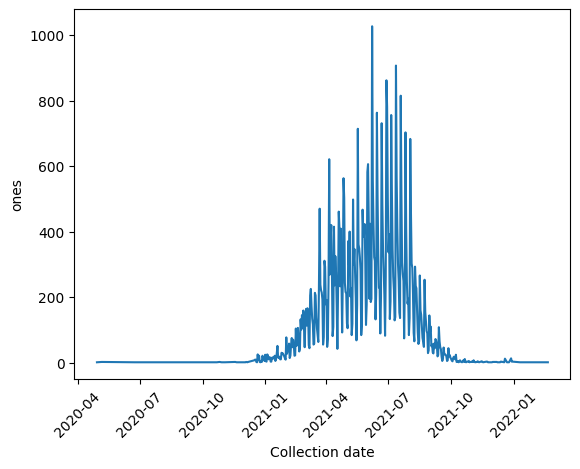

In [9]:
sns.lineplot(data=df.groupby(['Collection date'])['ones'].sum().reset_index(), x="Collection date", y="ones")
plt.xticks(rotation=45);

In [10]:
df.count()

Accession ID       53831
Collection date    53831
Submission date    53831
Location           53831
continent          53831
country            53831
state              53831
municipality       25856
ones               53831
dtype: int64

In [11]:
round(27975*100/53831,1)

52.0

In [12]:
df_muni_null = df[df.municipality.isna()]

In [13]:
df_state_muni_null = df_muni_null.groupby(['Collection date','state'])['ones'].sum().reset_index()

In [14]:
df_state_muni_null[df_state_muni_null.state == 'Rio de Janeiro']

,Collection date,state,ones
0,2020-04-29,Rio de Janeiro,1
69,2021-02-05,Rio de Janeiro,2
76,2021-02-07,Rio de Janeiro,2
101,2021-02-15,Rio de Janeiro,1
127,2021-02-22,Rio de Janeiro,1
...,...,...,...
1595,2021-10-06,Rio de Janeiro,1
1597,2021-10-07,Rio de Janeiro,1
1619,2021-11-09,Rio de Janeiro,2
1627,2021-12-05,Rio de Janeiro,1


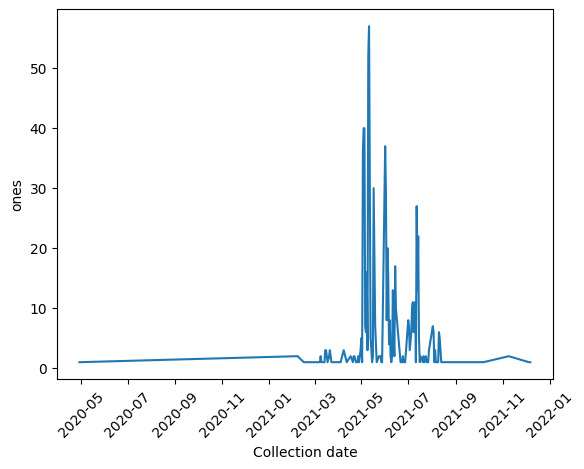

In [15]:
sns.lineplot(data=df_state_muni_null[df_state_muni_null.state == 'Rio de Janeiro'], x="Collection date", y="ones")
plt.xticks(rotation=45);

In [16]:
df_muni_NN = df[df.municipality.notnull()]

In [17]:
df_muni_NN['Collection date'].min()

Timestamp('2020-05-06 00:00:00')

In [18]:
df_muni_NN['Collection date'].max()

Timestamp('2022-02-20 00:00:00')

In [19]:
df[df['Collection date'] < '2020-05-06']

,Accession ID,Collection date,Submission date,Location,continent,country,state,municipality,ones
1384,EPI_ISL_15977585,2020-04-29,2022-12-01,South America / Brazil / Rio de Janeiro,South America,Brazil,Rio de Janeiro,None,1


In [20]:
df.sort_values(by='Collection date').head(10) 

,Accession ID,Collection date,Submission date,Location,continent,country,state,municipality,ones
1384,EPI_ISL_15977585,2020-04-29,2022-12-01,South America / Brazil / Rio de Janeiro,South America,Brazil,Rio de Janeiro,None,1
8267,EPI_ISL_11359362,2020-05-06,2022-03-24,South America / Brazil / Para / Belem,South America,Brazil,Para,Belem,1
9788,EPI_ISL_11359363,2020-05-06,2022-03-24,South America / Brazil / Para / Belem,South America,Brazil,Para,Belem,1
1030,EPI_ISL_3703149,2020-06-23,2021-08-26,South America / Brazil / Pernambuco / Salgueiro,South America,Brazil,Pernambuco,Salgueiro,1
9354,EPI_ISL_5645745,2020-08-07,2021-10-28,South America / Brazil / Sao Paulo,South America,Brazil,Sao Paulo,None,1
5339,EPI_ISL_6633673,2020-08-24,2021-11-23,South America / Brazil / Mato Grosso do Sul / ...,South America,Brazil,Mato Grosso do Sul,Campo Grande,1
3832,EPI_ISL_2344299,2020-09-11,2021-05-30,South America / Brazil / Sao Paulo / Ribeirao ...,South America,Brazil,Sao Paulo,Ribeirao Preto,1
1050,EPI_ISL_3704564,2020-09-22,2021-08-26,South America / Brazil / Pernambuco / Petrolina,South America,Brazil,Pernambuco,Petrolina,1
2528,EPI_ISL_2241496,2020-10-01,2021-05-24,South America / Brazil / Paraiba / Ingá,South America,Brazil,Paraiba,Ingá,1
9547,EPI_ISL_10909973,2020-10-14,2022-03-11,South America / Brazil / Ceara,South America,Brazil,Ceara,None,1


# Select cities to associate with path of transmission

In [21]:
cases_date = df.groupby(['Collection date'])['ones'].sum().reset_index()

In [22]:
cases_date = cases_date.assign(cases_cum = cases_date['ones'].cumsum())

In [23]:
cases_date

,Collection date,ones,cases_cum
0,2020-04-29,1,1
1,2020-05-06,2,3
2,2020-06-23,1,4
3,2020-08-07,1,5
4,2020-08-24,1,6
...,...,...,...
371,2021-12-28,13,53823
372,2021-12-29,3,53826
373,2021-12-30,3,53829
374,2022-01-10,1,53830


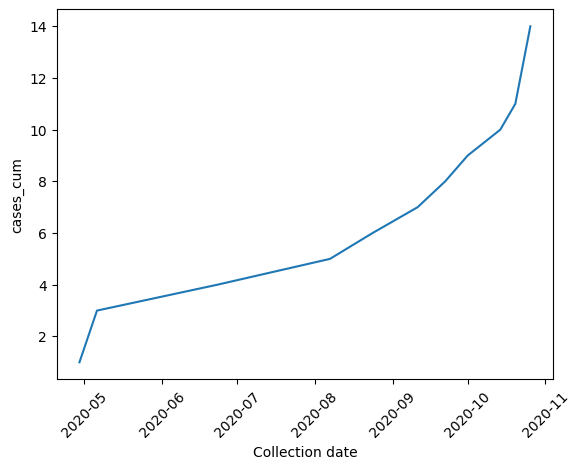

In [24]:
sns.lineplot(data= cases_date[0:12], x="Collection date", y="cases_cum")
plt.xticks(rotation=45);

In [25]:
df_muni_NN[df_muni_NN['Collection date'] < '2020-12-01'].municipality.unique()

array(['Goiania', 'Salgueiro', 'Petrolina', 'Campo Grande', 'Belem',
       'Campo Bom', 'Bauru', 'Ingá', 'Volta Redonda', 'Tres Rios',
       'Ribeirao Preto', 'Curitiba', 'Porto Alegre'], dtype=object)

In [26]:
df_muni_NN[df_muni_NN['Collection date'] < '2020-12-01'].state.unique()

array(['Goias', 'Pernambuco', 'Mato Grosso do Sul', 'Para',
       'Rio Grande do Sul', 'Sao Paulo', 'Paraiba', 'Rio de Janeiro',
       'Parana'], dtype=object)

In [29]:
df_muni_NN[df_muni_NN['Collection date'] < '2020-12-01'].groupby(['state','municipality'])['ones'].sum().reset_index()

,state,municipality,ones
0,Goias,Goiania,1
1,Mato Grosso do Sul,Campo Grande,1
2,Para,Belem,5
3,Paraiba,Ingá,1
4,Parana,Curitiba,1
5,Pernambuco,Petrolina,1
6,Pernambuco,Salgueiro,1
7,Rio Grande do Sul,Campo Bom,1
8,Rio Grande do Sul,Porto Alegre,1
9,Rio de Janeiro,Tres Rios,1
